# Setup

In [1]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [3]:
#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

# Load Various Data

In [4]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount_19,workingPop_19,commutePercent_19,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7720.0,69422.0,11.120394,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,90313.0,323548.0,27.913324,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,4136.0,53083.0,7.791572,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6558.0,55731.0,11.767239,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25671.0,418341.0,6.136382,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8894.0,50856.0,17.488595,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,10260.0,0.000000,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10934.0,0.000000,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,9978.0,34969.0,28.533844,10044.0,33194.0,30.258480,True


In [ ]:
intSpeed = pd.read_pickle(sharedFolder + 'gdfIntSpeed.pkl')
intSpeed = intSpeed[['CBSA', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']]
intSpeed

,CBSA,avg_d_kbps,avg_u_kbps,avg_lat_ms
0,12020,116639.954856,32428.263378,67372
1,12060,153887.736638,63655.298458,855541
2,12100,174465.459939,20559.716506,27635
3,12120,66830.706638,13182.695931,38769
4,12140,83860.505972,24242.484256,28338
...,...,...,...,...
921,49060,86484.161369,12903.985330,12645
922,49080,17896.781818,4633.023377,5595
923,49100,78410.593370,24917.274033,15727
924,49180,117152.688993,37439.513599,200047


In [5]:
acsData = pd.read_pickle(sharedFolder + 'ACS_data.pkl')
acsData

,CBSA,year,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,...,Avg_Comp_EngSci,Avg_Mngmt_Bus_Fin,Education_Pop,Less_High_pct,High_Equiv_pct,College_Assoc_Equiv_pct,Bachelors_pct,Grad_Prof_pct,Bach_and_Above_pct,Computer_Total
0,10100,2009,38997,19038,19959,42.050000,40.450000,43.250000,37087,23,...,38105.500000,39177.500000,303538.0,0.119293,0.159697,0.208863,0.222806,0.289341,0.512147,0.0
1,10100,2010,40058,19558,20500,42.900000,41.650000,44.200000,37805,159,...,62964.000000,39343.000000,318079.0,0.105005,0.161372,0.189387,0.221712,0.322524,0.544236,0.0
2,10100,2011,40315,19782,20533,42.900000,41.550000,43.900000,38036,248,...,60625.000000,41471.500000,324925.0,0.123705,0.162136,0.189493,0.230696,0.293969,0.524666,0.0
3,10100,2012,40612,20001,20611,42.650000,41.150000,43.700000,38214,286,...,50026.000000,44340.500000,333678.0,0.143414,0.158584,0.192128,0.231816,0.274058,0.505874,0.0
4,10100,2013,41033,20159,20874,42.950000,40.750000,44.500000,38428,396,...,51799.500000,46930.000000,340742.0,0.136552,0.161568,0.193930,0.231950,0.276001,0.507950,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,99999,2017,22372520,11150761,11221759,43.116812,41.836739,44.505797,18146065,2173702,...,58514.555556,49949.856522,228304207.0,0.123651,0.163611,0.182954,0.238989,0.290794,0.529783,0.0
12060,99999,2018,22272518,11099521,11172997,43.271522,41.953478,44.660942,18001192,2194587,...,60418.756824,51386.551449,234733435.0,0.124274,0.164304,0.183187,0.239112,0.289124,0.528235,0.0
12061,99999,2019,22178554,11052803,11125751,43.427246,42.142174,44.830580,17868699,2205230,...,61846.193041,52567.494203,240615087.0,0.126011,0.165254,0.183618,0.238212,0.286905,0.525116,0.0
12062,99999,2020,22103803,11015701,11088102,43.565243,42.268863,44.940912,17478046,2163319,...,63396.634934,53648.170891,245357846.0,0.125985,0.166843,0.185187,0.237769,0.284216,0.521985,0.0


# Join together

In [6]:
# gdf = pd.merge(gdf, intSpeed, on='CBSA')
gdf = pd.merge(gdf, acsData, on='CBSA')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,Avg_Comp_EngSci,Avg_Mngmt_Bus_Fin,Education_Pop,Less_High_pct,High_Equiv_pct,College_Assoc_Equiv_pct,Bachelors_pct,Grad_Prof_pct,Bach_and_Above_pct,Computer_Total
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,38876.333333,43689.000000,456186.0,0.110139,0.162383,0.195466,0.253712,0.278299,0.532011,0.0
1,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,50411.000000,42803.000000,460671.0,0.105229,0.167297,0.190277,0.255792,0.281405,0.537197,0.0
2,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,45007.000000,46864.000000,489453.0,0.108895,0.152497,0.166465,0.243752,0.328391,0.572143,0.0
3,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,48032.000000,48364.666667,506661.0,0.102998,0.152792,0.160464,0.257034,0.326712,0.583745,0.0
4,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,50801.666667,49836.333333,512289.0,0.106528,0.151139,0.164144,0.254487,0.323702,0.578189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033,49820,Micropolitan Statistical Area,13874,13893,13849,"Zapata, TX","POLYGON ((-11063533.373 3121145.410, -11063672...",False,True,"POLYGON ((-11231367.159 3143424.471, -11231876...",...,NaN,60350.000000,127545.0,0.088087,0.231126,0.241131,0.439657,0.000000,0.439657,0.0
12034,49820,Micropolitan Statistical Area,13874,13893,13849,"Zapata, TX","POLYGON ((-11063533.373 3121145.410, -11063672...",False,True,"POLYGON ((-11231367.159 3143424.471, -11231876...",...,NaN,46981.000000,175648.0,0.064407,0.138521,0.164767,0.328543,0.303761,0.632304,0.0
12035,49820,Micropolitan Statistical Area,13874,13893,13849,"Zapata, TX","POLYGON ((-11063533.373 3121145.410, -11063672...",False,True,"POLYGON ((-11231367.159 3143424.471, -11231876...",...,NaN,62438.000000,134081.0,0.087499,0.235537,0.237618,0.439346,0.000000,0.439346,0.0
12036,49820,Micropolitan Statistical Area,13874,13893,13849,"Zapata, TX","POLYGON ((-11063533.373 3121145.410, -11063672...",False,True,"POLYGON ((-11231367.159 3143424.471, -11231876...",...,120208.000000,50370.000000,132536.0,0.133526,0.159549,0.266456,0.440469,0.000000,0.440469,0.0


# Analysis

In [9]:
byYear = gdf.groupby(by=['year', 'CBSA']).first()

In [10]:
byYear.columns

Index(['LSAD', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'NAME',
       'geometry', 'metro', 'micro', 'buff', 'inBuff', 'commuteBuffCount_19',
       'workingPop_19', 'commutePercent_19', 'commuteBuffCount_20',
       'workingPop_20', 'commutePercent_20', 'liminal', 'Total_Population',
       'Total_Male_Pop', 'Total_Female_Pop', 'Median_Age', 'M_Median_Age',
       'F_Median_Age', 'Race_white', 'Race_black', 'Race_Am_Indian',
       'Race_Asian', 'Race_Pac_Isl', 'Median_Income', 'Less_High',
       'High_Equiv', 'College_Assoc_Equiv', 'Bachelors', 'Grad_Prof',
       'Ag_For_Fish_Hunt_Mine', 'Construction', 'Manufacturing', 'Wholesale',
       'Retail', 'Trans_Ware_Util', 'Information', 'Fin_Insur_Real',
       'Fin_Insur', 'Real_Rental', 'Prof_Sci_Tech', 'Mngmt_Enter',
       'Admin_WstMngmt', 'Ed_Servc', 'Hlthcr_Social', 'Arts_Entr_Rec',
       'Accom_Food_Srvc', 'Other_Servc', 'Public_admin', 'Num_Total_Worker',
       'Num_Comp_Info_Res', 'Num_Soft_Dev', 'Num_Comp_S

In [39]:
gdfs = {}
for year in range(2009, 2021+1):
    gdfs[year] = byYear.loc[year].copy()

for year in range(2009+1, 2021+1):
    gdfs[year]['growth'] = (gdfs[year]['Median_Income'] - gdfs[year-1]['Median_Income']) / gdfs[year-1]['Median_Income']

gdfs[2019]['growth']

CBSA
10100    0.049337
10140    0.027346
10180    0.001033
10220    0.017095
10300    0.022978
           ...   
49660    0.033971
49700    0.061004
49740    0.031856
49780    0.004546
49820    0.202667
Name: growth, Length: 926, dtype: float64

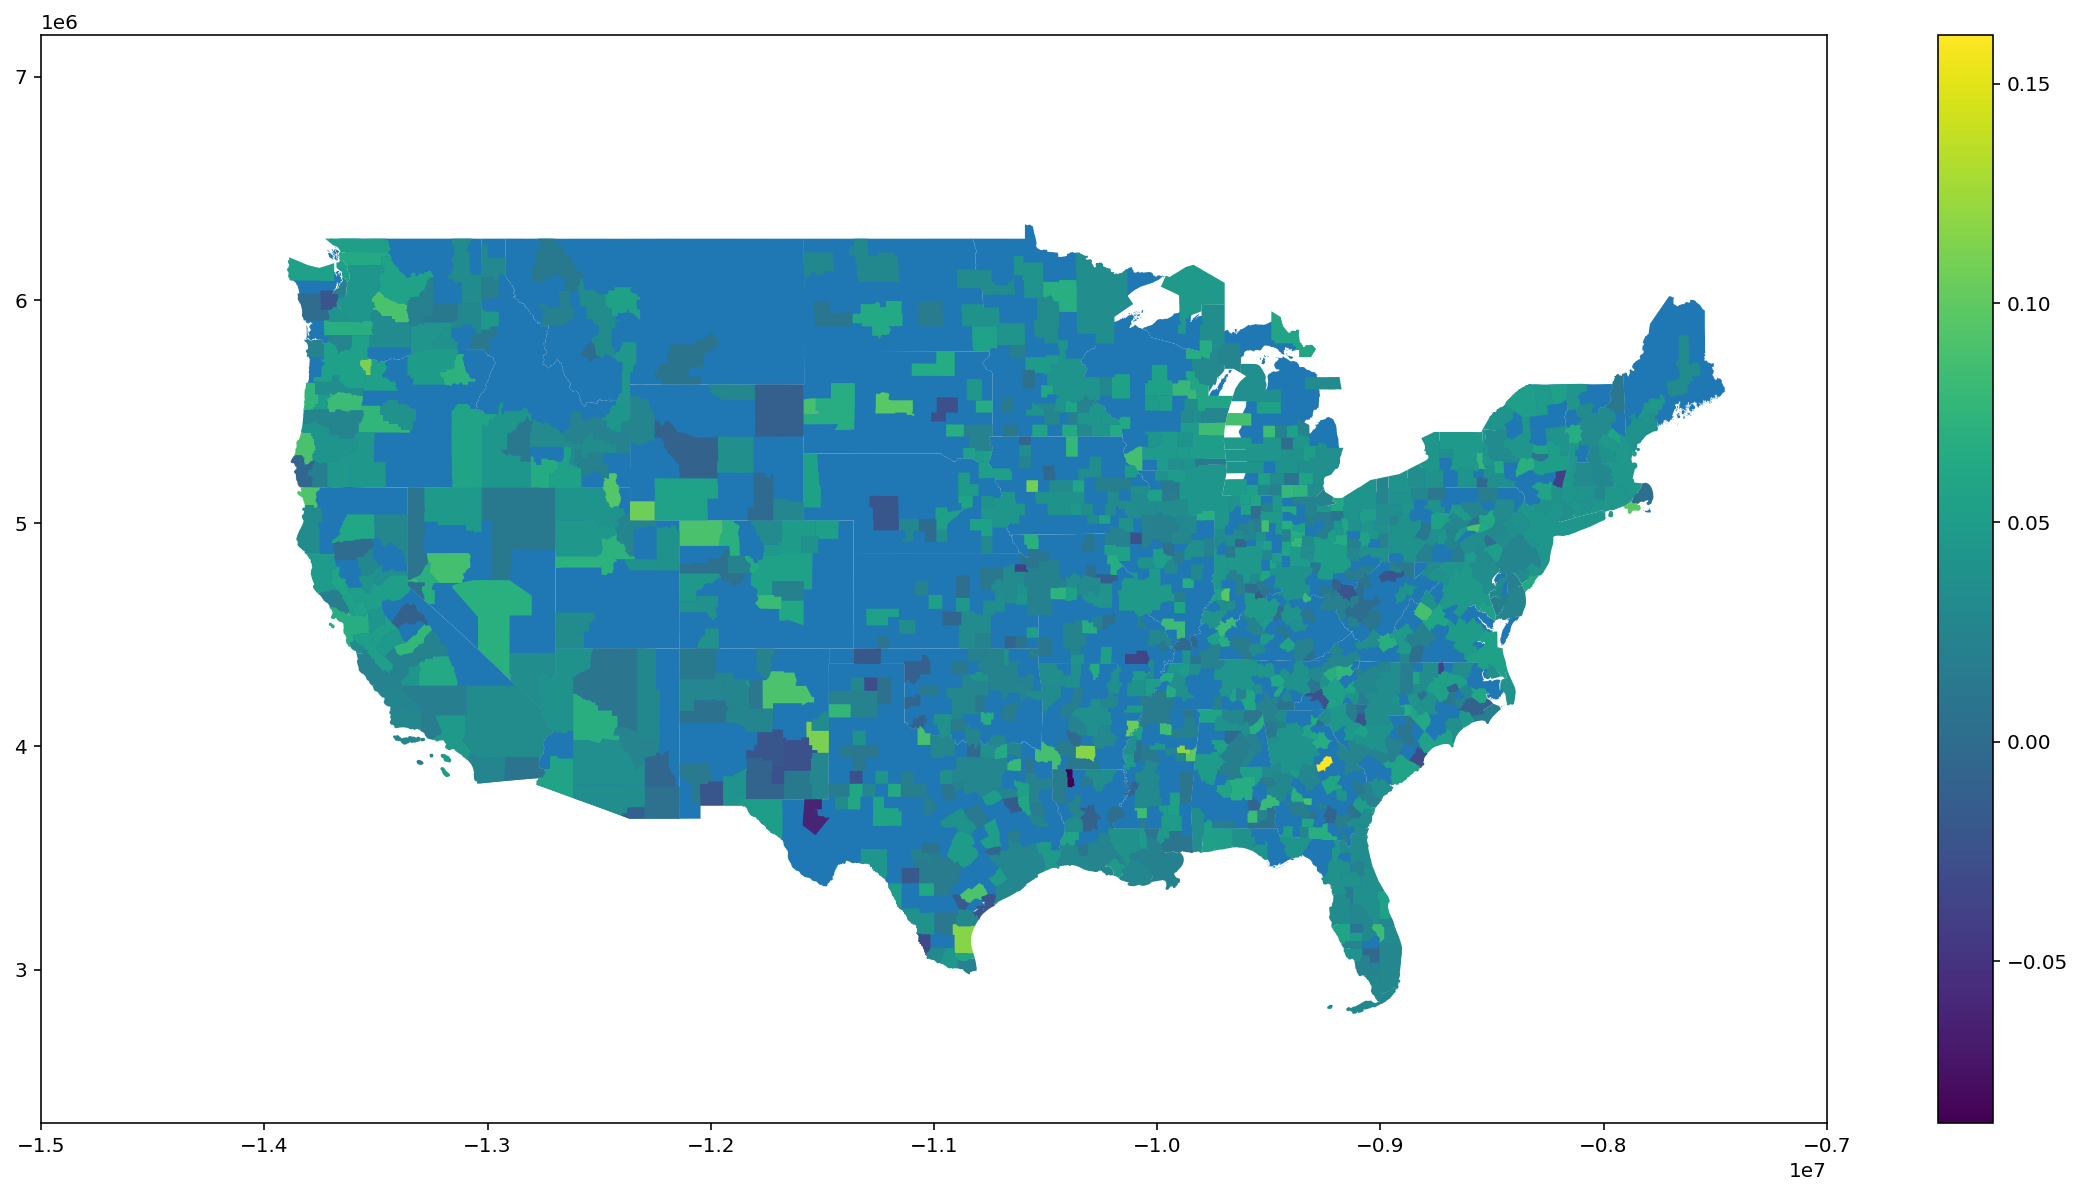

In [34]:
ax = plotUS()
gdfs[2018].plot(ax=ax, column='growth', legend=True);

In [40]:
print(gdfs[2020]['growth'].mean())
print(gdfs[2020][gdfs[2020]['metro']]['growth'].mean())
# print(gdf[gdf['micro']]['Median_Income'].median())
print(gdfs[2020][gdfs[2020]['liminal']]['growth'].mean())
print(gdfs[2020][gdfs[2020]['micro'] & ~gdfs[2020]['liminal']]['growth'].mean())

0.02887687203538106
0.029002473307414758
0.029992465541239847
0.02570740527854765


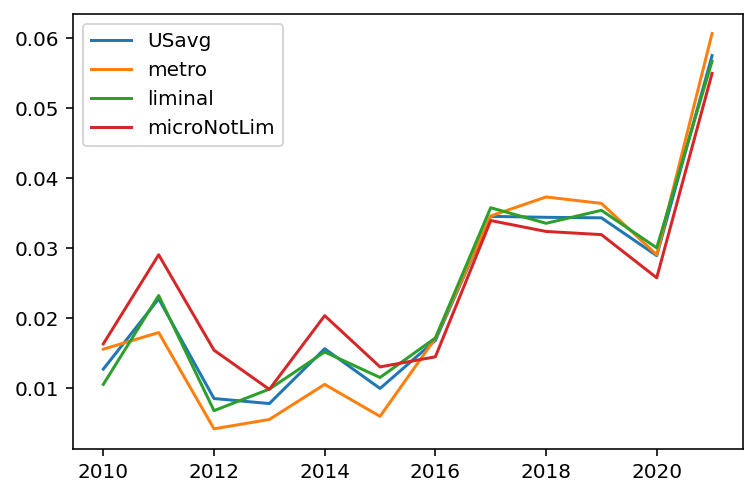

In [44]:
USavg = []
metro = []
liminal = []
microNotLim = []
years = list(range(2010, 2021+1))
for year in years:
    gdfYear = gdfs[year]
    USavg.append(gdfYear['growth'].mean())
    metro.append(gdfYear[gdfYear['metro']]['growth'].mean())
    liminal.append(gdfYear[gdfYear['liminal']]['growth'].mean())
    microNotLim.append(gdfYear[gdfYear['micro'] & ~gdfYear['liminal']]['growth'].mean())

plt.plot(years, USavg, label="USavg")
plt.plot(years, metro, label="metro")
plt.plot(years, liminal, label="liminal")
plt.plot(years, microNotLim, label="microNotLim")
plt.legend();

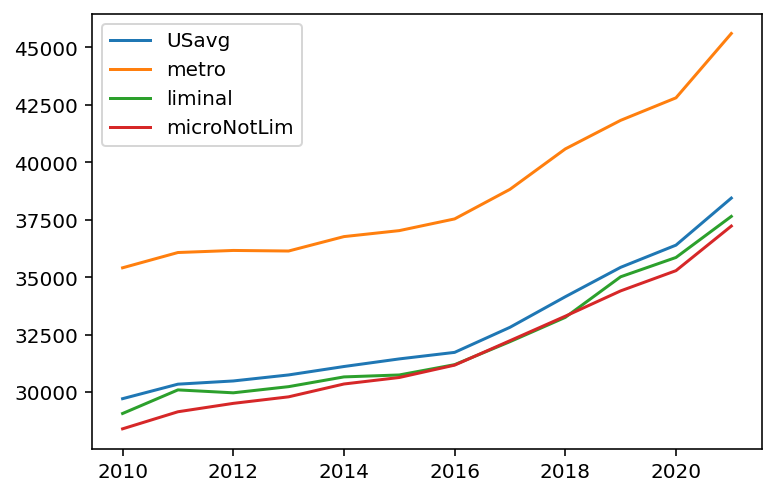

In [63]:
USavg = []
metro = []
liminal = []
microNotLim = []
years = list(range(2010, 2021+1))
for year in years:
    gdfYear = gdfs[year]
    lim = gdfYear['liminal'] & (gdfYear['commutePercent_20'] > 20)
    USavg.append(gdfYear['Median_Income'].median())
    metro.append(gdfYear[gdfYear['metro']]['Median_Income'].median())
    liminal.append(gdfYear[lim]['Median_Income'].median())
    microNotLim.append(gdfYear[gdfYear['micro'] & ~lim]['Median_Income'].mean())

plt.plot(years, USavg, label="USavg")
plt.plot(years, metro, label="metro")
plt.plot(years, liminal, label="liminal")
plt.plot(years, microNotLim, label="microNotLim")
plt.legend();

In [11]:
print(gdf['Median_Income'].median())
print(gdf[gdf['metro']]['Median_Income'].median())
# print(gdf[gdf['micro']]['Median_Income'].median())
print(gdf[gdf['liminal']]['Median_Income'].median())
print(gdf[gdf['micro'] & ~gdf['liminal']]['Median_Income'].median())

38448.0
45608.382352941175
37153.0
36952.25


In [12]:
print(gdf['avg_d_kbps'].median())
print(gdf[gdf['metro']]['avg_d_kbps'].median())
# print(gdf[gdf['micro']]['avg_d_kbps'].mean())
print(gdf[gdf['liminal']]['avg_d_kbps'].median())
print(gdf[gdf['micro'] & ~gdf['liminal']]['avg_d_kbps'].median())

96638.48172809719
138333.33952299404
87295.89176730992
79353.93803869351


In [69]:
gdfs[2010][gdfs[2010]['liminal']][['Median_Income', 'commutePercent_19']].corr()

,Median_Income,commutePercent_19
Median_Income,1.000000,0.084526
commutePercent_19,0.084526,1.000000
